In [1]:
import numpy as np

In [8]:
def johnson2M(jobMatrix):
    nb_machine, nb_jobs = jobMatrix.shape
    jobMatrix = np.vstack((jobMatrix,list(range(nb_jobs))))

    jobOrder = [0] * nb_jobs
    idxJob1, idxJob2 = (0, nb_jobs-1)

    for _ in range(nb_jobs):
        idx = jobMatrix.argmin(axis=1)

        if (jobMatrix[0,idx[0]]<jobMatrix[1,idx[1]]):
            jobOrder[idxJob1] = int(jobMatrix[2,idx[0]])
            idxJob1 += 1
            jobMatrix = np.delete(jobMatrix,idx[0],1)
        else:
            jobOrder[idxJob2] = int(jobMatrix[2,idx[1]])
            idxJob2 -= 1
            jobMatrix = np.delete(jobMatrix,idx[1],1)
    
    return jobOrder

In [9]:
jobMatrix = np.loadtxt(fname='jobMatrix.txt')

jobOrder = johnson2M(jobMatrix)
jobOrder

[2, 7, 4, 3, 1, 5, 6, 0]

In [10]:
def makeGanttTable(jobMatrix,jobOrder):
    nb_machine, nb_jobs = jobMatrix.shape
    ganttTable = np.zeros((nb_jobs,4))
    ganttTable[0,0] = 0
    ganttTable[0,1] = jobMatrix[0,jobOrder[0]]
    ganttTable[0,2] = jobMatrix[0,jobOrder[0]]
    ganttTable[0,3] = jobMatrix[0,jobOrder[0]] + jobMatrix[1,jobOrder[0]]
    for i in range(1,nb_jobs):
        for j in range(0,nb_machine):
            ganttTable[i,2*j] = ganttTable[i-1,1]
            ganttTable[i,1] = ganttTable[i,0] + jobMatrix[0,jobOrder[i]]
            ganttTable[i,2] = max(ganttTable[i-1,3],ganttTable[i,1])
            ganttTable[i,3] = ganttTable[i,2] + jobMatrix[1,jobOrder[i]]

    return ganttTable


In [11]:
makeGanttTable(jobMatrix,jobOrder)

array([[  0.,   8.,   8.,  21.],
       [  8.,  17.,  21.,  36.],
       [ 17.,  28.,  36.,  50.],
       [ 28.,  55.,  55.,  75.],
       [ 55.,  87.,  87., 106.],
       [ 87., 103., 106., 113.],
       [103., 116., 116., 122.],
       [116., 131., 131., 137.]])

In [12]:
def makespan(jobMatrix,jobOrder):
    return makeGanttTable(jobMatrix,jobOrder)[-1,-1]

In [13]:
makespan(jobMatrix,jobOrder)

137.0

In [14]:
def neh(jobMatrix):
    nb_machine, nb_jobs = jobMatrix.shape
    jobs_with_total_times = [(job_id, sum(job)) for job_id, job in enumerate(jobMatrix.T)]
    order = []
    for job in sorted(jobs_with_total_times, key=lambda x: x[1], reverse = True):
        candidates = []
        for i in range(0, len(order) + 1):
            candidate = order[:i] + [job[0]] + order[i:]
            candidates.append((candidate, makespan(jobMatrix,candidate)))
        order = min(candidates, key = lambda x: x[1])[0]
    return order

In [15]:
jobOrder = neh(jobMatrix)
makespan(jobMatrix,jobOrder)

137.0

In [16]:
from itertools import permutations

def optimal(jobMatrix):
    nb_machine, nb_jobs = jobMatrix.shape
    return min(permutations(range(nb_jobs)),key = lambda x: makespan(jobMatrix,x))

In [22]:
jobMatrix = np.loadtxt(fname='jobMatrix.txt')

print(jobMatrix)

jobOrder = optimal(jobMatrix)
gantt = makeGanttTable(jobMatrix,jobOrder)
print(gantt)
makespan(jobMatrix,jobOrder)

[[15. 32.  8. 27. 11. 16. 13.  9.]
 [ 6. 19. 13. 20. 14.  7.  6. 15.]
 [ 7. 21.  9. 35. 12.  8. 15. 13.]]
[[  0.  15.  15.  21.]
 [ 15.  23.  23.  36.]
 [ 23.  55.  55.  74.]
 [ 55.  66.  74.  88.]
 [ 66.  75.  88. 103.]
 [ 75. 102. 103. 123.]
 [102. 118. 123. 130.]
 [118. 131. 131. 137.]]


137.0

# Gantt

In [177]:
import matplotlib.pyplot as plt

def plotGantt(jobMatrix,jobOrder):
    fig, ax = plt.subplots()

    nb_machine, nb_jobs = jobMatrix.shape
    ganttTable = makeGanttTable(jobMatrix,jobOrder)

    for i in range(nb_jobs):
        ax.broken_barh([(ganttTable[i,0], ganttTable[i,1]-ganttTable[i,0]), (ganttTable[i,2], ganttTable[i,3]-ganttTable[i,2])], (10*i, 10), facecolors=('red', 'yellow'))

    ax.set_ylim(-10, 75)
    ax.set_xlim(0, 150)
    ax.set_xlabel('Temps')
    ax.set_yticks([0,10,20, 30,40,50,60,70])
    ax.set_yticklabels(["Task1","Task1","Task1","Task1","Task1","Task1","Task1"])
    ax.grid(True)
    plt.savefig(fname="gantt.png")
    plt.show()


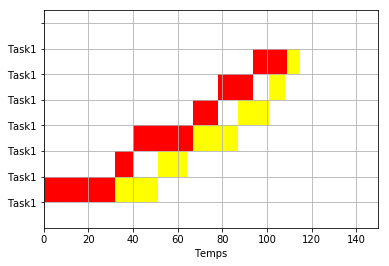

In [178]:
plotGantt(jobMatrix,jobOrder)